In [1]:
import numpy as np
import pandas as pd 
from numpy import log, exp
from itertools import product 
import matplotlib.pyplot as plt 
from scipy.stats import lognorm
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from skforecast.metrics import symmetric_mean_absolute_percentage_error as smape

Compute the RMSE and Symmetric Mean Absolute Percentage Error (sMAPE) of the predictions:

For actual values \( y_t \) and predictions \( \hat{y}_t \):

$$\text{sMAPE} = \frac{100\%}{n} \sum_{t=1}^n \frac{|y_t - \hat{y}_t|}{\frac{|y_t| + |\hat{y}_t|}{2}}$$

Parametros estimados pela CDF:

In [3]:
df_cdf = pd.read_csv('results/preds_CDF_cases_weights_equal_v3.csv')

#df_cdf.loc[df_cdf.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]

In [4]:
df_cdf.isnull().sum()

model               0
forecast_date       0
target_end_date     0
horizon             0
lower_95            0
lower_80            0
lower_50            0
pred                0
upper_50            0
upper_80            0
upper_95            0
value               0
mu                 14
sigma               0
dtype: int64

Parâmetros estimados pela KL:

In [5]:
df_kl = pd.read_csv('results/preds_KL_2.csv')

#df_kl.loc[df_kl.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_kl.head()

,model,forecast_date,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,upper_95,value,mu,sigma
0,BPagano-RtDriven,2020-10-18,2020-10-24,1,252157.46981,309027.43446,360710.91108,418324.95041,475938.98974,527622.46637,584492.43102,485474.0,12.838487,0.208747
1,BPagano-RtDriven,2020-10-18,2020-10-31,2,250557.34760,325076.22060,392799.04150,468292.90380,543786.76609,611509.58699,686028.46000,572162.0,12.925423,0.250265
2,BPagano-RtDriven,2020-10-18,2020-11-07,3,236909.92449,332846.68480,420034.10156,517226.07830,614418.05504,701605.47179,797542.23210,777428.0,12.991771,0.300785
3,BPagano-RtDriven,2020-10-18,2020-11-14,4,213876.19851,330803.52595,437067.18958,555524.36963,673981.54967,780245.21330,897172.54074,1028914.0,13.027909,0.352790
4,BPagano-RtDriven,2020-10-25,2020-10-31,1,299044.13571,364922.81525,424793.42033,491534.04269,558274.66504,618145.27012,684023.94966,572162.0,13.001782,0.205413


In [6]:
df_kl.columns

Index(['model', 'forecast_date', 'target_end_date', 'horizon', 'lower_95',
       'lower_80', 'lower_50', 'pred', 'upper_50', 'upper_80', 'upper_95',
       'value', 'mu', 'sigma'],
      dtype='object')

In [7]:
df_aprox = df_cdf.merge(df_kl, left_on = ['model', 'target_end_date', 'horizon', 'value',
                                         'lower_95', 'lower_80', 'lower_50', 'pred',
                                          'upper_50', 'upper_80', 'upper_95'],
                        right_on =['model', 'target_end_date', 'horizon', 'value',
                                   'lower_95', 'lower_80', 'lower_50', 'pred',
                                   'upper_50', 'upper_80', 'upper_95'],suffixes=('_cdf', '_kl'))

df_aprox.target_end_date = pd.to_datetime(df_aprox.target_end_date)

df_aprox = df_aprox.loc[df_aprox.value > 1]
df_aprox.head()

,model,forecast_date_cdf,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,upper_95,value,mu_cdf,sigma_cdf,forecast_date_kl,mu_kl,sigma_kl
0,BPagano-RtDriven,2020-10-18,2020-10-24,1,252157.46981,309027.43446,360710.91108,418324.95041,475938.98974,527622.46637,584492.43102,485474.0,12.934439,0.205498,2020-10-18,12.838487,0.208747
1,BPagano-RtDriven,2020-10-18,2020-10-31,2,250557.34760,325076.22060,392799.04150,468292.90380,543786.76609,611509.58699,686028.46000,572162.0,13.043683,0.241115,2020-10-18,12.925423,0.250265
2,BPagano-RtDriven,2020-10-18,2020-11-07,3,236909.92449,332846.68480,420034.10156,517226.07830,614418.05504,701605.47179,797542.23210,777428.0,13.138261,0.281946,2020-10-18,12.991771,0.300785
3,BPagano-RtDriven,2020-10-18,2020-11-14,4,213876.19851,330803.52595,437067.18958,555524.36963,673981.54967,780245.21330,897172.54074,1028914.0,13.204400,0.321069,2020-10-18,13.027909,0.352790
4,BPagano-RtDriven,2020-10-25,2020-10-31,1,299044.13571,364922.81525,424793.42033,491534.04269,558274.66504,618145.27012,684023.94966,572162.0,13.099669,0.940347,2020-10-25,13.001782,0.205413


In [8]:
df_aprox.isnull().sum()

model                 0
forecast_date_cdf     0
target_end_date       0
horizon               0
lower_95              0
lower_80              0
lower_50              0
pred                  0
upper_50              0
upper_80              0
upper_95              0
value                 0
mu_cdf               14
sigma_cdf             0
forecast_date_kl      0
mu_kl                 0
sigma_kl              0
dtype: int64

In [9]:
df_aprox = df_aprox.dropna()
df_aprox.reset_index()

,index,model,forecast_date_cdf,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,upper_95,value,mu_cdf,sigma_cdf,forecast_date_kl,mu_kl,sigma_kl
0,0,BPagano-RtDriven,2020-10-18,2020-10-24,1,252157.46981,309027.43446,360710.911080,418324.950410,475938.989740,5.276225e+05,5.844924e+05,485474.0,12.934439,0.205498,2020-10-18,12.838487,0.208747
1,1,BPagano-RtDriven,2020-10-18,2020-10-31,2,250557.34760,325076.22060,392799.041500,468292.903800,543786.766090,6.115096e+05,6.860285e+05,572162.0,13.043683,0.241115,2020-10-18,12.925423,0.250265
2,2,BPagano-RtDriven,2020-10-18,2020-11-07,3,236909.92449,332846.68480,420034.101560,517226.078300,614418.055040,7.016055e+05,7.975422e+05,777428.0,13.138261,0.281946,2020-10-18,12.991771,0.300785
3,3,BPagano-RtDriven,2020-10-18,2020-11-14,4,213876.19851,330803.52595,437067.189580,555524.369630,673981.549670,7.802452e+05,8.971725e+05,1028914.0,13.204400,0.321069,2020-10-18,13.027909,0.352790
4,4,BPagano-RtDriven,2020-10-25,2020-10-31,1,299044.13571,364922.81525,424793.420330,491534.042690,558274.665040,6.181453e+05,6.840239e+05,572162.0,13.099669,0.940347,2020-10-25,13.001782,0.205413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,6786,UVA-Ensemble,2022-03-07,2022-04-02,4,0.00000,0.00000,0.000000,204654.866196,643894.167065,1.039223e+06,1.481017e+06,198718.0,12.229080,1.267919,2022-03-07,13.114930,0.527459
6773,6787,UVA-Ensemble,2022-03-14,2022-03-19,1,0.00000,0.00000,29607.178921,239906.562208,450205.945496,6.394820e+05,8.510044e+05,215103.0,12.388005,0.765017,2022-03-14,12.339188,0.633568
6774,6788,UVA-Ensemble,2022-03-14,2022-03-26,2,0.00000,0.00000,0.000000,224153.581860,496489.350306,7.416000e+05,1.015520e+06,210000.0,12.320087,0.933618,2022-03-14,12.804609,0.522736
6775,6789,UVA-Ensemble,2022-03-14,2022-04-02,3,0.00000,0.00000,0.000000,201139.124620,490377.596230,7.507012e+05,1.041622e+06,198718.0,12.211752,0.999955,2022-03-14,12.814268,0.514027


Mediana e percentil de 95% estimado por cada uma das aproximações: 

In [10]:
for lb in ['cdf', 'kl']: 
    df_aprox[f'med_{lb}'] = lognorm.ppf(0.5, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)
    df_aprox[f'upper_95_{lb}'] = lognorm.ppf(0.975, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)

df_aprox.head()

,model,forecast_date_cdf,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,...,value,mu_cdf,sigma_cdf,forecast_date_kl,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl
0,BPagano-RtDriven,2020-10-18,2020-10-24,1,252157.46981,309027.43446,360710.91108,418324.95041,475938.98974,527622.46637,...,485474.0,12.934439,0.205498,2020-10-18,12.838487,0.208747,414338.489362,6.198343e+05,376429.876865,566721.197394
1,BPagano-RtDriven,2020-10-18,2020-10-31,2,250557.34760,325076.22060,392799.04150,468292.90380,543786.76609,611509.58699,...,572162.0,13.043683,0.241115,2020-10-18,12.925423,0.250265,462167.635447,7.413733e+05,410619.725347,670604.004592
2,BPagano-RtDriven,2020-10-18,2020-11-07,3,236909.92449,332846.68480,420034.10156,517226.07830,614418.05504,701605.47179,...,777428.0,13.138261,0.281946,2020-10-18,12.991771,0.300785,508012.330184,8.828100e+05,438787.701428,791193.604868
3,BPagano-RtDriven,2020-10-18,2020-11-14,4,213876.19851,330803.52595,437067.18958,555524.36963,673981.54967,780245.21330,...,1028914.0,13.204400,0.321069,2020-10-18,13.027909,0.352790,542747.787771,1.018339e+06,454934.534747,908331.361478
4,BPagano-RtDriven,2020-10-25,2020-10-31,1,299044.13571,364922.81525,424793.42033,491534.04269,558274.66504,618145.27012,...,572162.0,13.099669,0.940347,2020-10-25,13.001782,0.205413,488780.362368,3.087016e+06,443202.606107,662903.507515


In [11]:
df_aprox.isnull().sum()

model                0
forecast_date_cdf    0
target_end_date      0
horizon              0
lower_95             0
lower_80             0
lower_50             0
pred                 0
upper_50             0
upper_80             0
upper_95             0
value                0
mu_cdf               0
sigma_cdf            0
forecast_date_kl     0
mu_kl                0
sigma_kl             0
med_cdf              0
upper_95_cdf         0
med_kl               0
upper_95_kl          0
dtype: int64

In [12]:
df_aprox[df_aprox.isnull().any(axis=1)]

,model,forecast_date_cdf,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,...,value,mu_cdf,sigma_cdf,forecast_date_kl,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl


In [13]:
df_aprox[df_aprox.isnull().any(axis=1)]

,model,forecast_date_cdf,target_end_date,horizon,lower_95,lower_80,lower_50,pred,upper_50,upper_80,...,value,mu_cdf,sigma_cdf,forecast_date_kl,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl


Erro RMSE entre as medias e percentil superior de 95% estimados por cada uma das aproximações: 

In [14]:
df_erros = pd.DataFrame()

for model, state, val_test in product(df_aprox['model'].unique(), df_aprox['target_end_date'].unique(), df_aprox['horizon'].unique()):

    try: 
        df_model = df_aprox.loc[(df_aprox.model == model) & (df_aprox.target_end_date == state) & (df_aprox.horizon == val_test)]
    
        df_erros = pd.concat([df_erros,
                             pd.DataFrame([[state, model, val_test, 
                                            rmse(df_model.pred, df_model.med_cdf), 
                                            rmse(df_model.upper_95, df_model.upper_95_cdf),
                                            rmse(df_model.pred, df_model.med_kl), 
                                            rmse(df_model.upper_95, df_model.upper_95_kl),
                                            smape(df_model.pred, df_model.med_cdf), 
                                            smape(df_model.upper_95, df_model.upper_95_cdf),
                                            smape(df_model.pred, df_model.med_kl), 
                                            smape(df_model.upper_95, df_model.upper_95_kl)]],
                                         columns = ['target_end_date', 'model', 'horizon', 'rmse_pred_cdf', 'rmse_upper_cdf',
                                                    'rmse_pred_kl', 'rmse_upper_kl', 'mape_pred_cdf', 'mape_upper_cdf',
                                                    'mape_pred_kl', 'mape_upper_kl'])],
                            ignore_index = True)
    except: 
        pass 

df_erros.head()

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
0,2020-10-24,BPagano-RtDriven,1,3986.461048,3.534184e+04,41895.073545,17771.233626,0.957520,5.869145,10.542893,3.087391
1,2020-10-31,BPagano-RtDriven,1,2753.680322,2.402992e+06,48331.436583,21120.442145,0.561795,127.444537,10.341188,3.136092
2,2020-10-31,BPagano-RtDriven,2,6125.268353,5.534481e+04,57673.178453,15424.455408,1.316610,7.754622,13.123757,2.273933
3,2020-11-07,BPagano-RtDriven,1,4653.367254,4.116634e+04,49639.429945,21980.804195,0.918228,5.656593,10.250065,3.157322
4,2020-11-07,BPagano-RtDriven,2,467.730391,2.709096e+06,68571.406853,18509.276348,0.083786,124.722433,13.081422,2.289909


Summary comparing the methodologys: 

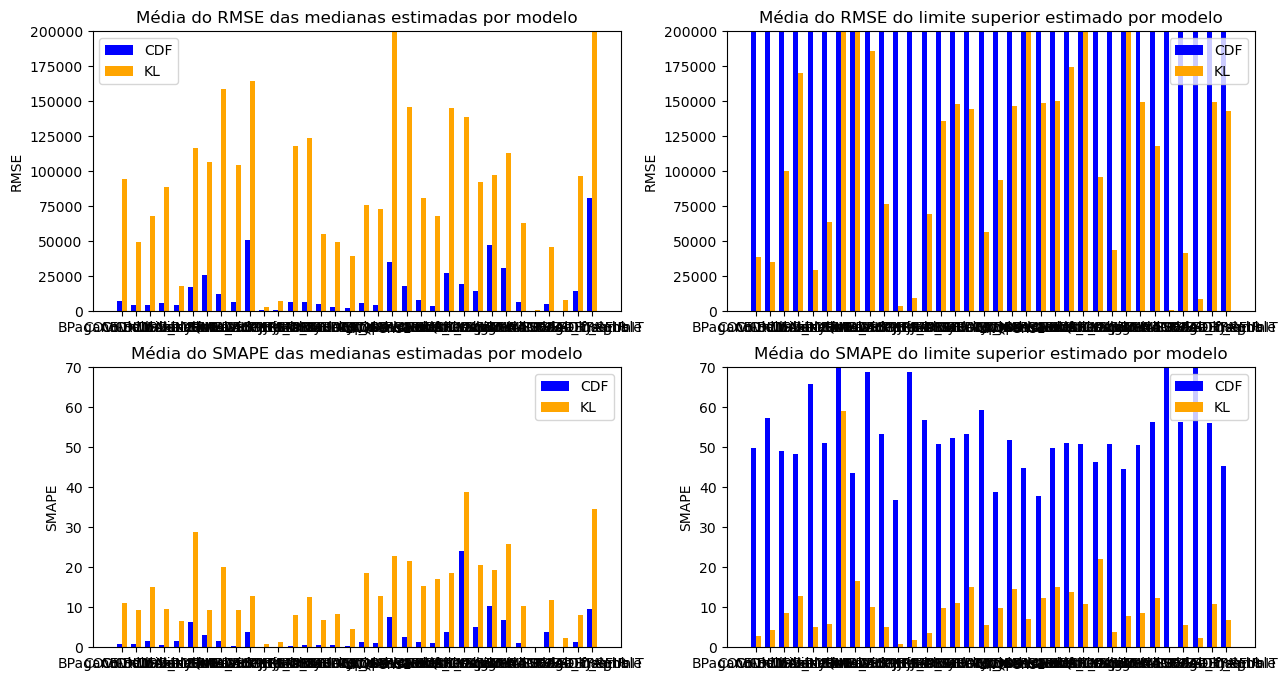

In [18]:
_, ax = plt.subplots(2, 2, figsize=(15, 8))

# Group data
pred_cdf = df_erros.groupby('model')[['rmse_pred_cdf']].mean()
upper_cdf = df_erros.groupby('model')[['rmse_upper_cdf']].mean()

pred_kl = df_erros.groupby('model')[['rmse_pred_kl']].mean()
upper_kl = df_erros.groupby('model')[['rmse_upper_kl']].mean()

pred_cdf_mape = df_erros.groupby('model')[['mape_pred_cdf']].mean()
upper_cdf_mape = df_erros.groupby('model')[['mape_upper_cdf']].mean()

pred_kl_mape = df_erros.groupby('model')[['mape_pred_kl']].mean()
upper_kl_mape = df_erros.groupby('model')[['mape_upper_kl']].mean()


x = np.arange(len(pred_cdf))  # positions for bars
width = 0.35  # width of the bars

# First subplot: side-by-side bars
ax[0,0].bar(x - width/2, pred_cdf.rmse_pred_cdf.values, width, label='CDF', color='blue')
ax[0,0].bar(x + width/2, pred_kl.rmse_pred_kl.values, width, label='KL', color='orange')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(pred_cdf.index.astype(str))
ax[0,0].legend()

ax[0,0].set_title('Média do RMSE das medianas estimadas por modelo')
ax[0,1].set_title('Média do RMSE do limite superior estimado por modelo')
ax[0,0].set_ylabel('RMSE')
#ax[0,0].set_xlabel('Modelo') 
ax[0,1].set_ylabel('RMSE') 

# Second subplot: side-by-side bars
ax[0,1].bar(x - width/2, upper_cdf.rmse_upper_cdf.values, width, label='CDF', color='blue')
ax[0,1].bar(x + width/2, upper_kl.rmse_upper_kl.values, width, label='KL', color='orange')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(upper_cdf.index.astype(str))
ax[0,1].legend()
ax[0,0].set_ylim([0, 200000])
ax[0,1].set_ylim([0, 200000])


ax[1,0].bar(x - width/2, pred_cdf_mape.mape_pred_cdf.values, width, label='CDF', color='blue')
ax[1,0].bar(x + width/2, pred_kl_mape.mape_pred_kl.values, width, label='KL', color='orange')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(pred_cdf.index.astype(str))
ax[1,0].legend()

ax[1,0].set_title('Média do SMAPE das medianas estimadas por modelo')
ax[1,1].set_title('Média do SMAPE do limite superior estimado por modelo')
ax[1,0].set_ylabel('SMAPE')
#ax[0,0].set_xlabel('Modelo') 
ax[1,1].set_ylabel('SMAPE') 

# Second subplot: side-by-side bars
ax[1,1].bar(x - width/2, upper_cdf_mape.mape_upper_cdf.values, width, label='CDF', color='blue')
ax[1,1].bar(x + width/2, upper_kl_mape.mape_upper_kl.values, width, label='KL', color='orange')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(upper_cdf.index.astype(str))
ax[1,1].legend()
ax[1,0].set_ylim([0, 70])
ax[1,1].set_ylim([0, 70])
plt.savefig('mean_erro.png', dpi = 400, bbox_inches = 'tight')
plt.show()

Visualização de algum modelo em detalhe: 

In [16]:
df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()]

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
6458,2022-01-15,USC-SI_kJalpha,4,1.407754e+06,1.391978e+07,2.576587e+06,464708.683544,30.012172,65.13344,62.748813,3.27746


In [17]:
df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()]

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
4267,2022-01-15,MIT-Cassandra,1,253771.975503,5.111574e+05,13223.712847,2.719125e+06,200.0,2.903902e+01,200.0,94.933980
4272,2022-01-22,MIT-Cassandra,2,289618.422495,5.833554e+05,14510.770375,3.145798e+06,200.0,2.903882e+01,200.0,95.613988
4277,2022-01-29,MIT-Cassandra,3,332379.329187,6.694852e+05,15804.136277,3.696018e+06,200.0,2.903882e+01,200.0,96.786065
4282,2022-02-05,MIT-Cassandra,4,382398.065195,7.702347e+05,16946.772027,4.239660e+06,200.0,2.903884e+01,200.0,96.638308
4303,2022-03-19,MIT-Cassandra,1,29682.686241,5.943604e+04,3512.703219,2.574535e+05,200.0,2.894002e+01,200.0,84.581424
5162,2021-03-13,OneQuietNight-ML,2,2794.564979,9.504492e+05,2737.363062,2.286732e+04,200.0,1.246467e+02,200.0,7.655008
5165,2021-03-20,OneQuietNight-ML,2,16223.881925,1.513463e-03,0.121377,1.152616e+05,200.0,1.313063e-06,200.0,199.998615
5166,2021-03-20,OneQuietNight-ML,3,374.162905,5.544186e-03,0.222795,2.316719e+05,200.0,2.393108e-06,200.0,199.998031
5168,2021-03-27,OneQuietNight-ML,3,19765.342296,4.947651e-10,0.121133,1.403806e+05,200.0,3.524445e-13,200.0,199.998865
5169,2021-03-27,OneQuietNight-ML,4,10272.839805,6.185460e-02,0.215501,4.280449e+05,200.0,1.445046e-05,200.0,199.998960
